In [18]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 120s 2ms/step - loss: 0.2654 - accuracy: 0.9177 - val_loss: 0.0620 - val_accuracy: 0.9804
Epoch 2/30
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0874 - accuracy: 0.9743 - val_loss: 0.0421 - val_accuracy: 0.9862
Epoch 3/30
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0402 - val_accuracy: 0.9863
Epoch 4/30
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0534 - accuracy: 0.9842 - val_loss: 0.0285 - val_accuracy: 0.9902
Epoch 5/30
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0266 - val_accuracy: 0.9910
Epoch 6/30
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0292 - val_accura

In [2]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h1>Assignment 13: 3 Different Architectures</h1>

Architecture 1 with kernel size (5*5) and with dropout 

In [4]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model_1.add(Dropout(0.65))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.8))
model_1.add(Dense(num_classes, activation='softmax'))
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,361,546
Trainable params: 2,361,546
Non-trainable params: 0
____________________________________________

In [5]:
model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 69s 1ms/step - loss: 0.5548 - accuracy: 0.8267 - val_loss: 0.1233 - val_accuracy: 0.9625
Epoch 2/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2849 - accuracy: 0.9176 - val_loss: 0.0890 - val_accuracy: 0.9717
Epoch 3/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2326 - accuracy: 0.9323 - val_loss: 0.0732 - val_accuracy: 0.9775
Epoch 4/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2110 - accuracy: 0.9392 - val_loss: 0.0697 - val_accuracy: 0.9782
Epoch 5/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1913 - accuracy: 0.9445 - val_loss: 0.0649 - val_accuracy: 0.9808
Epoch 6/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1856 - accuracy: 0.9472 - val_loss: 0.0627 - val_accuracy: 0.9814
Epoch 7/30
60000/60000 [==============================] - 68s 1ms/s

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
nb_epoch = 30

Test loss: 0.05157124159556406
Test accuracy: 0.984499990940094


<IPython.core.display.Javascript object>


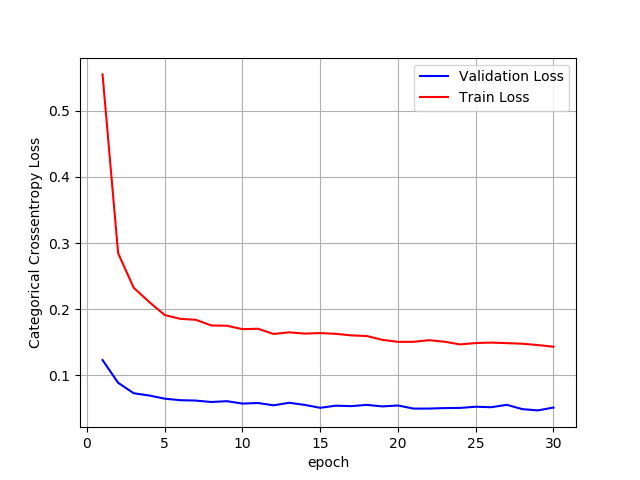

In [7]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1> Summary : Acheive the accuracy of 98.44% on Architecture 1 </h1>

Arhitecture 2 with kernel size (2*2) ,batch normalization and dropout

In [8]:
from keras.layers.normalization import BatchNormalization
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.55))


model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.8))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 27, 27, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 23328)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2986112   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [9]:
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 84s 1ms/step - loss: 0.9632 - accuracy: 0.6889 - val_loss: 0.6392 - val_accuracy: 0.9422
Epoch 2/30
60000/60000 [==============================] - 82s 1ms/step - loss: 0.4880 - accuracy: 0.8500 - val_loss: 0.2471 - val_accuracy: 0.9513
Epoch 3/30
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3951 - accuracy: 0.8848 - val_loss: 0.1249 - val_accuracy: 0.9660
Epoch 4/30
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3590 - accuracy: 0.8959 - val_loss: 0.1401 - val_accuracy: 0.9655
Epoch 5/30
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3329 - accuracy: 0.9034 - val_loss: 0.1307 - val_accuracy: 0.9692
Epoch 6/30
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3214 - accuracy: 0.9102 - val_loss: 0.0974 - val_accuracy: 0.9721
Epoch 7/30
60000/60000 [==============================] - 83s 1ms/st

Test loss: 0.12899916493708752
Test accuracy: 0.9742000102996826


<IPython.core.display.Javascript object>


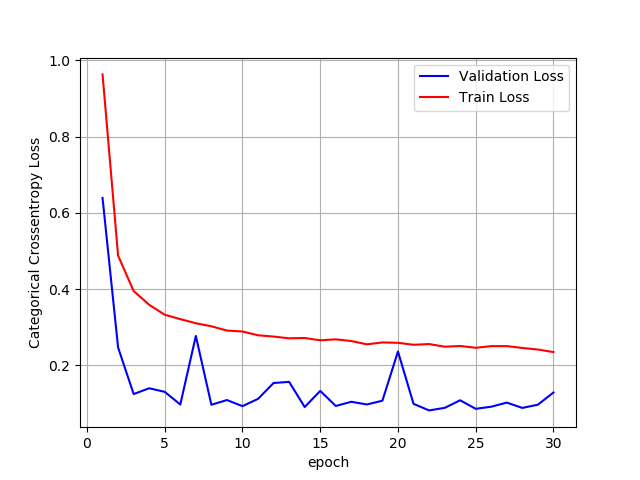

In [10]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>Summary : Acheive the accuracy of 97.42% for Architecture 2</h1>

Arcitecture 3 with kernel size (5*5) ,max pooling, batch normalization and dropout

In [4]:
from keras.layers.normalization import BatchNormalization
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(64, (2, 2), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(64, (2, 2),padding='same', activation='relu'))

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.8))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)         

In [5]:
model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.4181 - accuracy: 0.8668 - val_loss: 0.1571 - val_accuracy: 0.9544
Epoch 2/30
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1773 - accuracy: 0.9455 - val_loss: 0.0464 - val_accuracy: 0.9866
Epoch 3/30
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1384 - accuracy: 0.9588 - val_loss: 0.0394 - val_accuracy: 0.9888
Epoch 4/30
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 5/30
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0999 - accuracy: 0.9697 - val_loss: 0.0292 - val_accuracy: 0.9916
Epoch 6/30
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.0353 - val_accuracy: 0.9897
Epoch 7/30
60000/60000 [==============================] - 61s 1ms/s

Test loss: 0.03443996077049989
Test accuracy: 0.992900013923645


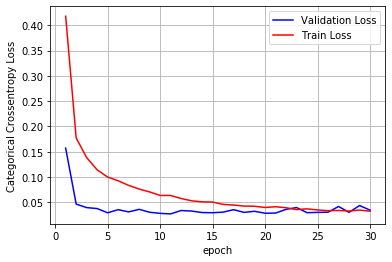

In [8]:
import matplotlib.pyplot as plt
nb_epoch = 30
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>Summary : Acheive the accuracy of 99.29% with Architecture 3</h1>

In [9]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","Kernel Size","Dropout_Layer", "Batch_Normalization", "Max Pooling", "Accuracy"]
x.add_row(["CNN","5*5","Yes", "No","No", 98.44])
x.add_row(["CNN","2*2","Yes", "Yes","No", 97.42])
x.add_row(["CNN","5*5","Yes", "Yes","Yes", 99.29])
print(x)

+-------+-------------+---------------+---------------------+-------------+----------+
| Model | Kernel Size | Dropout_Layer | Batch_Normalization | Max Pooling | Accuracy |
+-------+-------------+---------------+---------------------+-------------+----------+
|  CNN  |     5*5     |      Yes      |          No         |      No     |  98.44   |
|  CNN  |     2*2     |      Yes      |         Yes         |      No     |  97.42   |
|  CNN  |     5*5     |      Yes      |         Yes         |     Yes     |  99.29   |
+-------+-------------+---------------+---------------------+-------------+----------+
